Amenities
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [5]:
import pandas as pd

# Cargar únicamente la columna 'amenities' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['amenities'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'amenities' existe en el DataFrame
if 'amenities' in data.columns:
    # Tipo de dato
    tipo_dato = data['amenities'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['amenities'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['amenities'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['amenities'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['amenities'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'amenities':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'amenities' no existe en el DataFrame.")

Columna 'amenities':
 - Tipo de dato: object
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 245003
 - Cantidad de datos totales: 279712


Analisis cualitativo:
* Cantidad de datos difernets
* Moda
* Cantidad por variable
* Porcentaje por variable
* Obtener Frecuencia Absoluta
* Frecuencia Relativa

In [7]:
import pandas as pd
from collections import Counter
import ast
from tabulate import tabulate  # Necesitarás instalar esta biblioteca si no la tienes



# Verificar si la columna 'amenities' existe
if 'amenities' in data.columns:
    # Limpiar y convertir los strings de amenities a listas
    amenities_lists = []
    for amenities_str in data['amenities'].dropna():
        try:
            # Intentar convertir el string a lista usando ast.literal_eval
            amenities_list = ast.literal_eval(amenities_str)
            if isinstance(amenities_list, list):
                amenities_lists.append(amenities_list)
        except (SyntaxError, ValueError):
            # Si falla, intentar extraer manualmente
            if amenities_str.startswith('[') and amenities_str.endswith(']'):
                items = amenities_str[1:-1].split(',')
                clean_items = [item.strip().strip('"\'') for item in items if item.strip()]
                if clean_items:
                    amenities_lists.append(clean_items)
    
    # Aplanar la lista de listas
    amenities_flat = [amenity for sublist in amenities_lists for amenity in sublist]
    
    # Contar ocurrencias
    conteo_amenities = Counter(amenities_flat)
    
    # Convertir a DataFrame para mejor visualización
    df_conteo = pd.DataFrame(conteo_amenities.most_common(), columns=['amenity', 'frecuencia'])
    
    # Total de amenities
    total_amenities = len(amenities_flat)
    
    # Calcular porcentajes
    df_conteo['porcentaje'] = (df_conteo['frecuencia'] / total_amenities * 100).round(2)
    
    # Mostrar información general
    print(f"Columna 'amenities':")
    print(f" - Moda (amenity más común): {conteo_amenities.most_common(1)[0][0]}")
    print(f" - Total de amenities: {total_amenities}\n")
    
    # Mostrar tabla completa usando tabulate
    print("Tabla completa de amenities:")
    print(tabulate(df_conteo, headers=['Amenity', 'Frecuencia', 'Porcentaje (%)'], 
                  tablefmt='pretty', showindex=False))
    
    # Guardar a CSV si lo deseas
else:
    print("La columna 'amenities' no existe en el DataFrame.")

Columna 'amenities':
 - Moda (amenity más común): Wifi
 - Total de amenities: 5470389

Tabla completa de amenities:
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+----------------+
|                                                                                                                                                                                                                                 

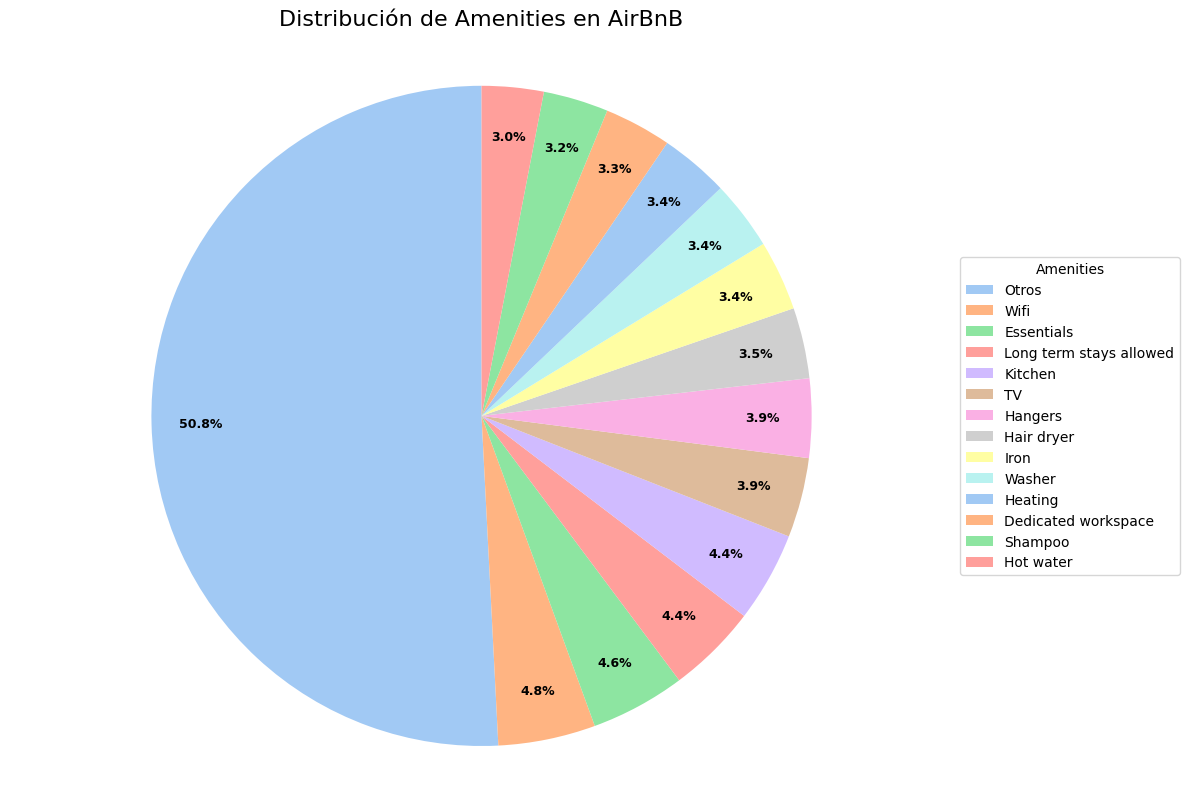

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV con los resultados
df = pd.read_csv('amenities_frecuencia.csv')

# Identificar amenities con menos de 3% y agruparlos como 'Otros'
otros_mask = df['porcentaje'] < 3
otros_sum = df.loc[otros_mask, 'porcentaje'].sum()

# Crear un nuevo DataFrame con las amenities >= 3% y la categoría 'Otros'
df_filtered = df[~otros_mask].copy()
if otros_sum > 0:
    otros_row = pd.DataFrame({'amenity': ['Otros'], 
                              'frecuencia': [df.loc[otros_mask, 'frecuencia'].sum()], 
                              'porcentaje': [otros_sum]})
    df_filtered = pd.concat([df_filtered, otros_row], ignore_index=True)

# Ordenar por porcentaje (de mayor a menor)
df_filtered = df_filtered.sort_values('porcentaje', ascending=False)

# Configurar el tamaño y estilo del gráfico
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', n_colors=len(df_filtered))

# Crear el gráfico de torta - sin sombra y porcentajes más alejados del centro
wedges, texts, autotexts = plt.pie(df_filtered['porcentaje'], 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors,
                                   shadow=False,  # Quitar sombra
                                   pctdistance=0.85)  # Alejar porcentajes del centro

# Añadir leyenda
plt.legend(wedges, df_filtered['amenity'], 
           title="Amenities",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Personalizar texto y diseño
plt.setp(autotexts, size=9, weight="bold")
plt.axis('equal')  # Asegurar que el pie se dibuje como un círculo
plt.title('Distribución de Amenities en AirBnB', size=16, pad=20)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

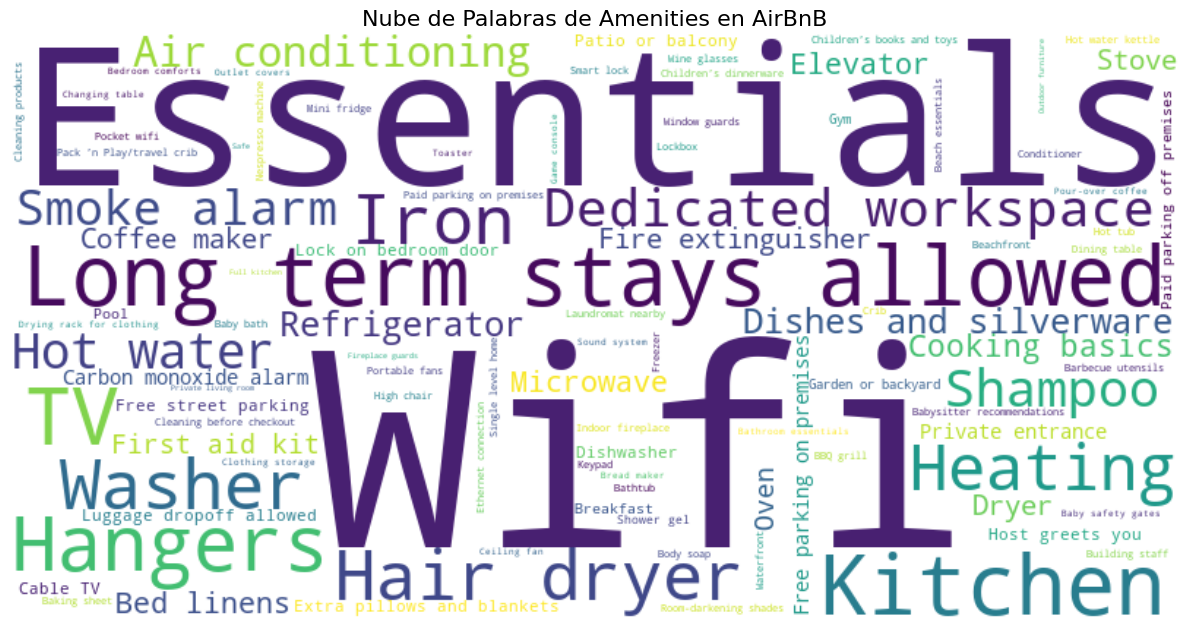

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar el CSV con los resultados
df = pd.read_csv('amenities_frecuencia.csv')

# Crear un diccionario con amenities como clave y frecuencia como valor
amenities_dict = dict(zip(df['amenity'], df['frecuencia']))

# Configurar el wordcloud
plt.figure(figsize=(12, 8))

# Crear la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # Usa un mapa de colores atractivo
    max_words=100,       # Limitar a las 100 amenities más frecuentes
    prefer_horizontal=0.9,  # Mayormente horizontal pero permite algunas palabras verticales
    random_state=42      # Para reproducibilidad
).generate_from_frequencies(amenities_dict)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.title('Nube de Palabras de Amenities en AirBnB', fontsize=16)
plt.tight_layout()
plt.show()